In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_4 = "../data/train_FD004.txt"

In [3]:
train_4 = pd.read_csv(train_4, sep=' ', header=None)
train_4.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,NaN,NaN
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,NaN,NaN
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,NaN,NaN
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,NaN,NaN
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,NaN,NaN


## train 1

In [4]:
index_names = ['ID Engine', 'Cycle']
setting_names = ['Setting 1', 'Setting 2', 'Setting 3']
sensor_names = ['Sensor {}'.format(i) for i in range(1, 22)]
column_names = index_names + setting_names + sensor_names
print(column_names)
print(f'Length columns = {len(column_names)}')

['ID Engine', 'Cycle', 'Setting 1', 'Setting 2', 'Setting 3', 'Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7', 'Sensor 8', 'Sensor 9', 'Sensor 10', 'Sensor 11', 'Sensor 12', 'Sensor 13', 'Sensor 14', 'Sensor 15', 'Sensor 16', 'Sensor 17', 'Sensor 18', 'Sensor 19', 'Sensor 20', 'Sensor 21']
Length columns = 26


In [5]:
train_4.drop([26, 27], axis=1, inplace=True)
train_4.columns = column_names
train_4.head()

,ID Engine,Cycle,Setting 1,Setting 2,Setting 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,...,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [6]:
train_4['Remaining RUL'] = ''
train_4.head()

,ID Engine,Cycle,Setting 1,Setting 2,Setting 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,...,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Remaining RUL
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,


In [7]:
train_4.groupby('ID Engine')['Cycle'].describe()

,count,mean,std,min,25%,50%,75%,max
ID Engine,,,,,,,,
1,321.0,161.0,92.808944,1.0,81.00,161.0,241.00,321.0
2,299.0,150.0,86.458082,1.0,75.50,150.0,224.50,299.0
3,307.0,154.0,88.767487,1.0,77.50,154.0,230.50,307.0
4,274.0,137.5,79.241193,1.0,69.25,137.5,205.75,274.0
5,193.0,97.0,55.858452,1.0,49.00,97.0,145.00,193.0
...,...,...,...,...,...,...,...,...
245,205.0,103.0,59.322565,1.0,52.00,103.0,154.00,205.0
246,161.0,81.0,46.620811,1.0,41.00,81.0,121.00,161.0
247,211.0,106.0,61.054620,1.0,53.50,106.0,158.50,211.0


In [8]:
train_4.describe()

,ID Engine,Cycle,Setting 1,Setting 2,Setting 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,...,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21
count,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,...,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000
mean,124.325181,134.311417,23.999823,0.571347,94.031576,472.882435,579.420056,1417.896600,1201.915359,8.031626,...,266.735665,2334.427590,8067.811812,9.285604,0.023252,347.760029,2228.613283,97.751396,20.864333,12.518995
std,71.995350,89.783389,14.780722,0.310703,14.251954,26.436832,37.342647,106.167598,119.327591,3.622872,...,138.479109,128.197859,85.670543,0.750374,0.004685,27.808283,145.472491,5.369424,9.936396,5.962697
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.480000,1242.670000,1024.420000,3.910000,...,128.310000,2027.570000,7845.780000,8.175700,0.020000,302.000000,1915.000000,84.930000,10.160000,6.084300
25%,60.000000,62.000000,10.004600,0.250700,100.000000,445.000000,549.330000,1350.550000,1119.490000,3.910000,...,134.520000,2387.910000,8062.630000,8.648000,0.020000,330.000000,2212.000000,100.000000,10.940000,6.566100
50%,126.000000,123.000000,25.001400,0.700000,100.000000,462.540000,555.740000,1367.680000,1136.920000,7.050000,...,183.450000,2388.060000,8083.810000,9.255600,0.020000,334.000000,2223.000000,100.000000,14.930000,8.960100
75%,185.000000,191.000000,41.998100,0.840000,100.000000,491.190000,607.070000,1497.420000,1302.620000,10.520000,...,371.400000,2388.170000,8128.350000,9.365800,0.030000,368.000000,2324.000000,100.000000,28.560000,17.135500
max,249.000000,543.000000,42.008000,0.842000,100.000000,518.670000,644.420000,1613.000000,1440.770000,14.620000,...,537.490000,2390.490000,8261.650000,11.066300,0.030000,399.000000,2388.000000,100.000000,39.890000,23.885200


In [9]:
max_cycle = train_4.groupby('ID Engine').count()
max_cycle.iloc[:, 0:1]

,Cycle
ID Engine,
1,321
2,299
3,307
4,274
5,193
...,...
245,205
246,161
247,211


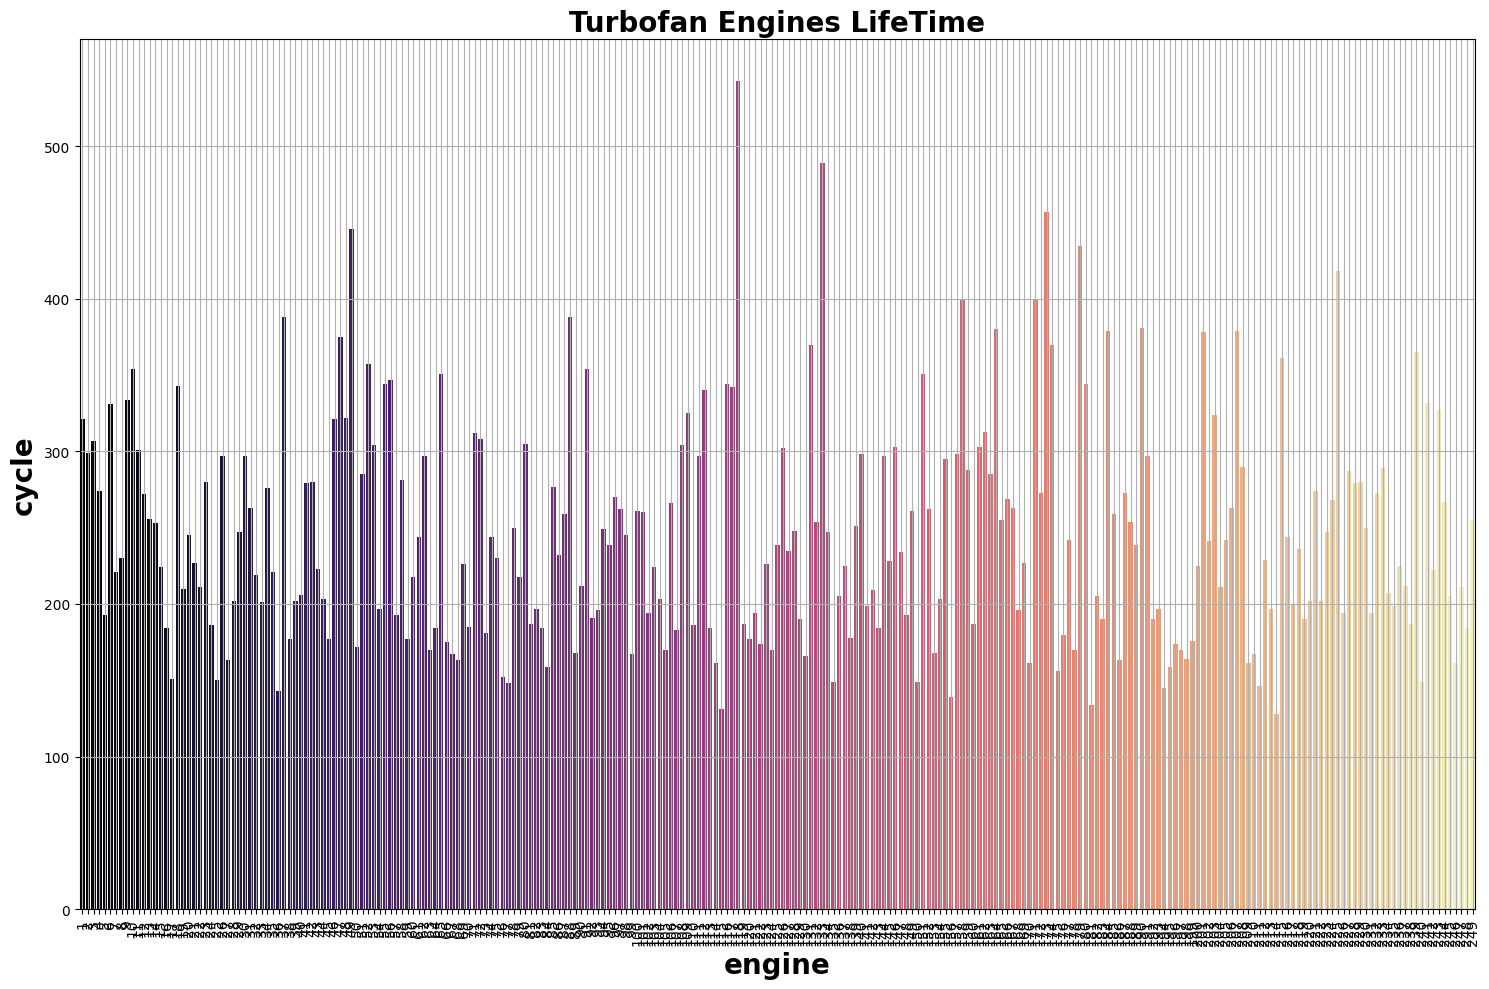

In [10]:
plt.figure(figsize=(15,10))
sns.barplot(x='ID Engine', y='Cycle', data=max_cycle, palette='magma')
sns.set_context(font_scale=0.01)
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=20)
plt.xlabel('engine',fontweight='bold',size=20)
plt.ylabel('cycle',fontweight='bold',size=20)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

Từ biểu đồ trên, chúng ta có thể thấy động cơ số 69 đã thực hiện nhiều chu kỳ nhất với giá trị là 362, điều này đã được xác nhận bởi bản tóm tắt dữ liệu được trình bày trước đó.
Ngoài ra, chúng ta có thể thấy rằng có một miền giá trị mà tất cả các động cơ đều hỏng.

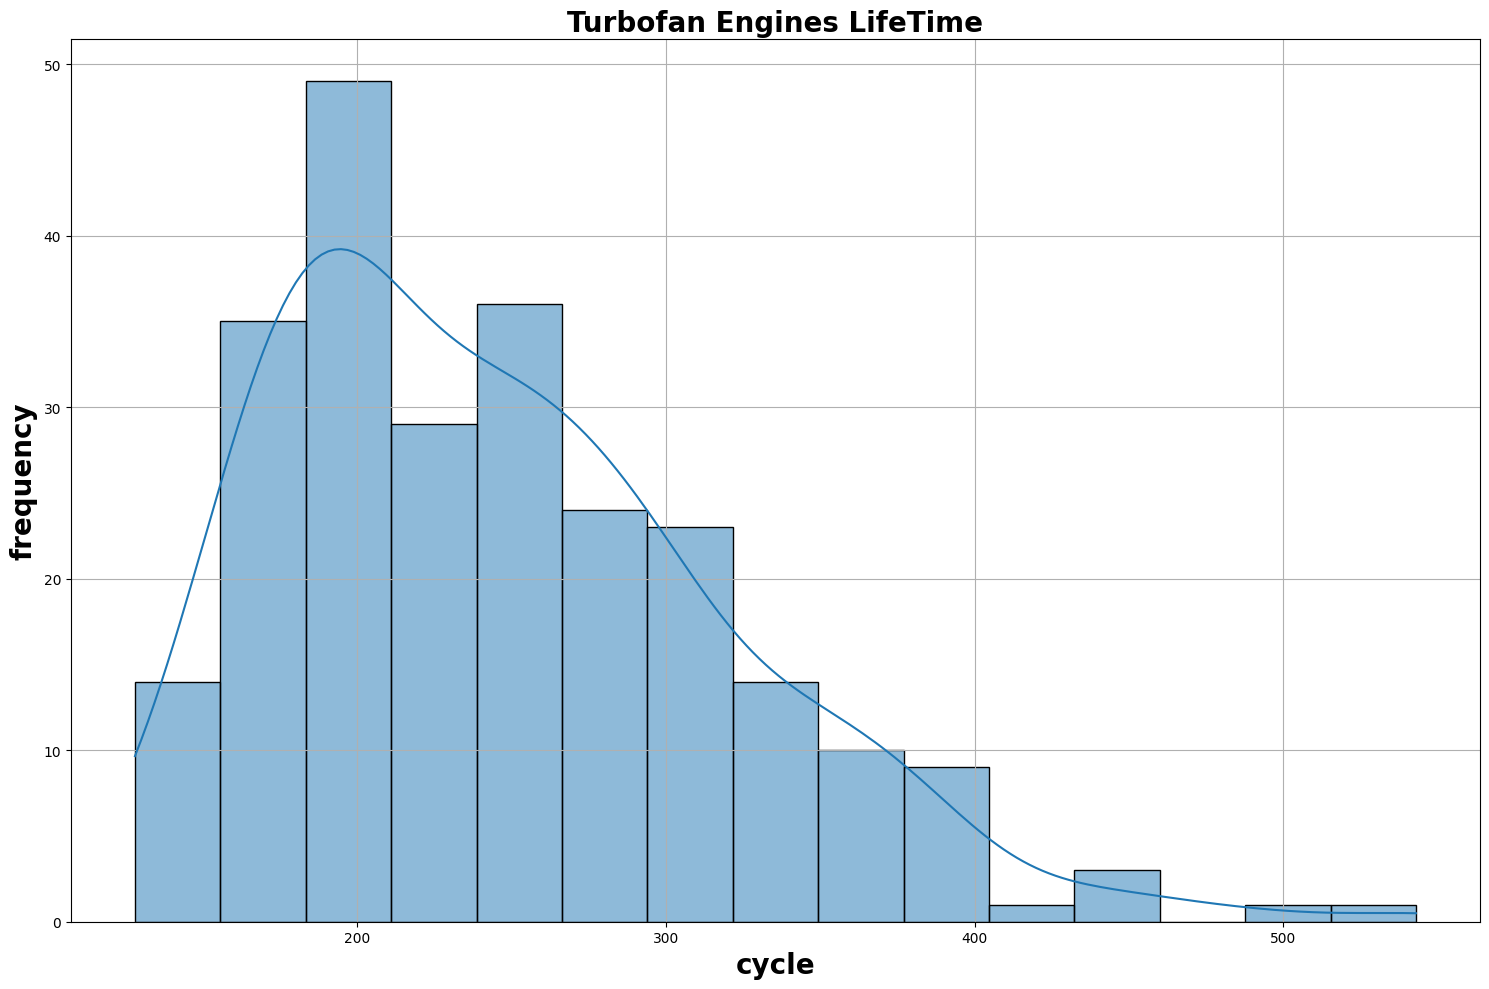

In [11]:
plt.figure(figsize=(15, 10))
sns.histplot(data=max_cycle['Cycle'],kde='True',bins=15)
sns.set_context(font_scale=0.01)
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=20)
plt.xlabel('cycle',fontweight='bold',size=20)
plt.ylabel('frequency',fontweight='bold',size=20)
plt.grid(True)
plt.tight_layout()

Phần lớn các động cơ có vẻ có tuổi thọ tối đa trong khoảng từ 150 đến 200 chu kỳ, với đỉnh điểm vào khoảng 200 chu kỳ, khi tần suất đạt khoảng 20 động cơ.
Phân phối hơi lệch, với độ dốc xuống dốc hơn sau 200 chu kỳ. Điều này chỉ ra rằng tương đối ít động cơ đạt được tuổi thọ tối đa cao, đặc biệt là sau 300 chu kỳ.

In [12]:
train_4_copy = train_4.copy()

In [13]:
print(max_cycle.loc[1, 'Cycle'])

321


In [14]:
# remaining_rul = max_rul - cycle
for idx in range(len(train_4)):
    train_4.loc[idx, 'Remaining RUL'] = max_cycle.loc[train_4.loc[idx, 'ID Engine'], 'Cycle']

In [15]:
train_4.iloc[190: 200, :]

,ID Engine,Cycle,Setting 1,Setting 2,Setting 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,...,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Remaining RUL
190,1,191,42.0059,0.8400,100.0,445.00,548.92,1346.81,1113.44,3.91,...,2388.02,8079.14,9.2945,0.02,328,2212,100.00,10.75,6.2907,321
191,1,192,10.0018,0.2500,100.0,489.05,604.41,1491.72,1301.44,10.52,...,2387.99,8129.48,8.5787,0.03,369,2319,100.00,28.69,17.0844,321
192,1,193,25.0049,0.6200,60.0,462.54,536.60,1258.63,1044.83,7.05,...,2028.21,7873.02,10.8566,0.02,306,1915,84.93,14.34,8.5716,321
193,1,194,10.0080,0.2514,100.0,489.05,604.14,1498.70,1309.30,10.52,...,2387.95,8128.62,8.6049,0.03,368,2319,100.00,28.89,17.2704,321
194,1,195,42.0007,0.8413,100.0,445.00,548.81,1343.82,1111.80,3.91,...,2388.07,8081.77,9.3235,0.02,330,2212,100.00,10.63,6.3835,321
195,1,196,0.0019,0.0000,100.0,518.67,642.12,1581.08,1394.64,14.62,...,2388.03,8139.81,8.4020,0.03,391,2388,100.00,38.96,23.3917,321
196,1,197,19.9981,0.7000,100.0,491.19,607.41,1481.08,1244.59,9.35,...,2387.94,8061.13,9.1940,0.02,363,2324,100.00,24.42,14.6526,321
197,1,198,25.0019,0.6219,60.0,462.54,536.93,1257.64,1036.17,7.05,...,2028.22,7862.80,10.8478,0.02,306,1915,84.93,14.34,8.5287,321
198,1,199,42.0021,0.8412,100.0,445.00,549.23,1343.17,1118.30,3.91,...,2388.06,8074.47,9.2917,0.02,331,2212,100.00,10.66,6.3127,321
199,1,200,25.0045,0.6200,60.0,462.54,536.75,1253.43,1032.68,7.05,...,2028.27,7859.86,10.8421,0.02,304,1915,84.93,14.48,8.6434,321


In [16]:
train_4['Remaining RUL'] = train_4['Remaining RUL'] - train_4['Cycle']

In [17]:
train_4.iloc[190: 200, :]

,ID Engine,Cycle,Setting 1,Setting 2,Setting 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,...,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Remaining RUL
190,1,191,42.0059,0.8400,100.0,445.00,548.92,1346.81,1113.44,3.91,...,2388.02,8079.14,9.2945,0.02,328,2212,100.00,10.75,6.2907,130
191,1,192,10.0018,0.2500,100.0,489.05,604.41,1491.72,1301.44,10.52,...,2387.99,8129.48,8.5787,0.03,369,2319,100.00,28.69,17.0844,129
192,1,193,25.0049,0.6200,60.0,462.54,536.60,1258.63,1044.83,7.05,...,2028.21,7873.02,10.8566,0.02,306,1915,84.93,14.34,8.5716,128
193,1,194,10.0080,0.2514,100.0,489.05,604.14,1498.70,1309.30,10.52,...,2387.95,8128.62,8.6049,0.03,368,2319,100.00,28.89,17.2704,127
194,1,195,42.0007,0.8413,100.0,445.00,548.81,1343.82,1111.80,3.91,...,2388.07,8081.77,9.3235,0.02,330,2212,100.00,10.63,6.3835,126
195,1,196,0.0019,0.0000,100.0,518.67,642.12,1581.08,1394.64,14.62,...,2388.03,8139.81,8.4020,0.03,391,2388,100.00,38.96,23.3917,125
196,1,197,19.9981,0.7000,100.0,491.19,607.41,1481.08,1244.59,9.35,...,2387.94,8061.13,9.1940,0.02,363,2324,100.00,24.42,14.6526,124
197,1,198,25.0019,0.6219,60.0,462.54,536.93,1257.64,1036.17,7.05,...,2028.22,7862.80,10.8478,0.02,306,1915,84.93,14.34,8.5287,123
198,1,199,42.0021,0.8412,100.0,445.00,549.23,1343.17,1118.30,3.91,...,2388.06,8074.47,9.2917,0.02,331,2212,100.00,10.66,6.3127,122
199,1,200,25.0045,0.6200,60.0,462.54,536.75,1253.43,1032.68,7.05,...,2028.27,7859.86,10.8421,0.02,304,1915,84.93,14.48,8.6434,121


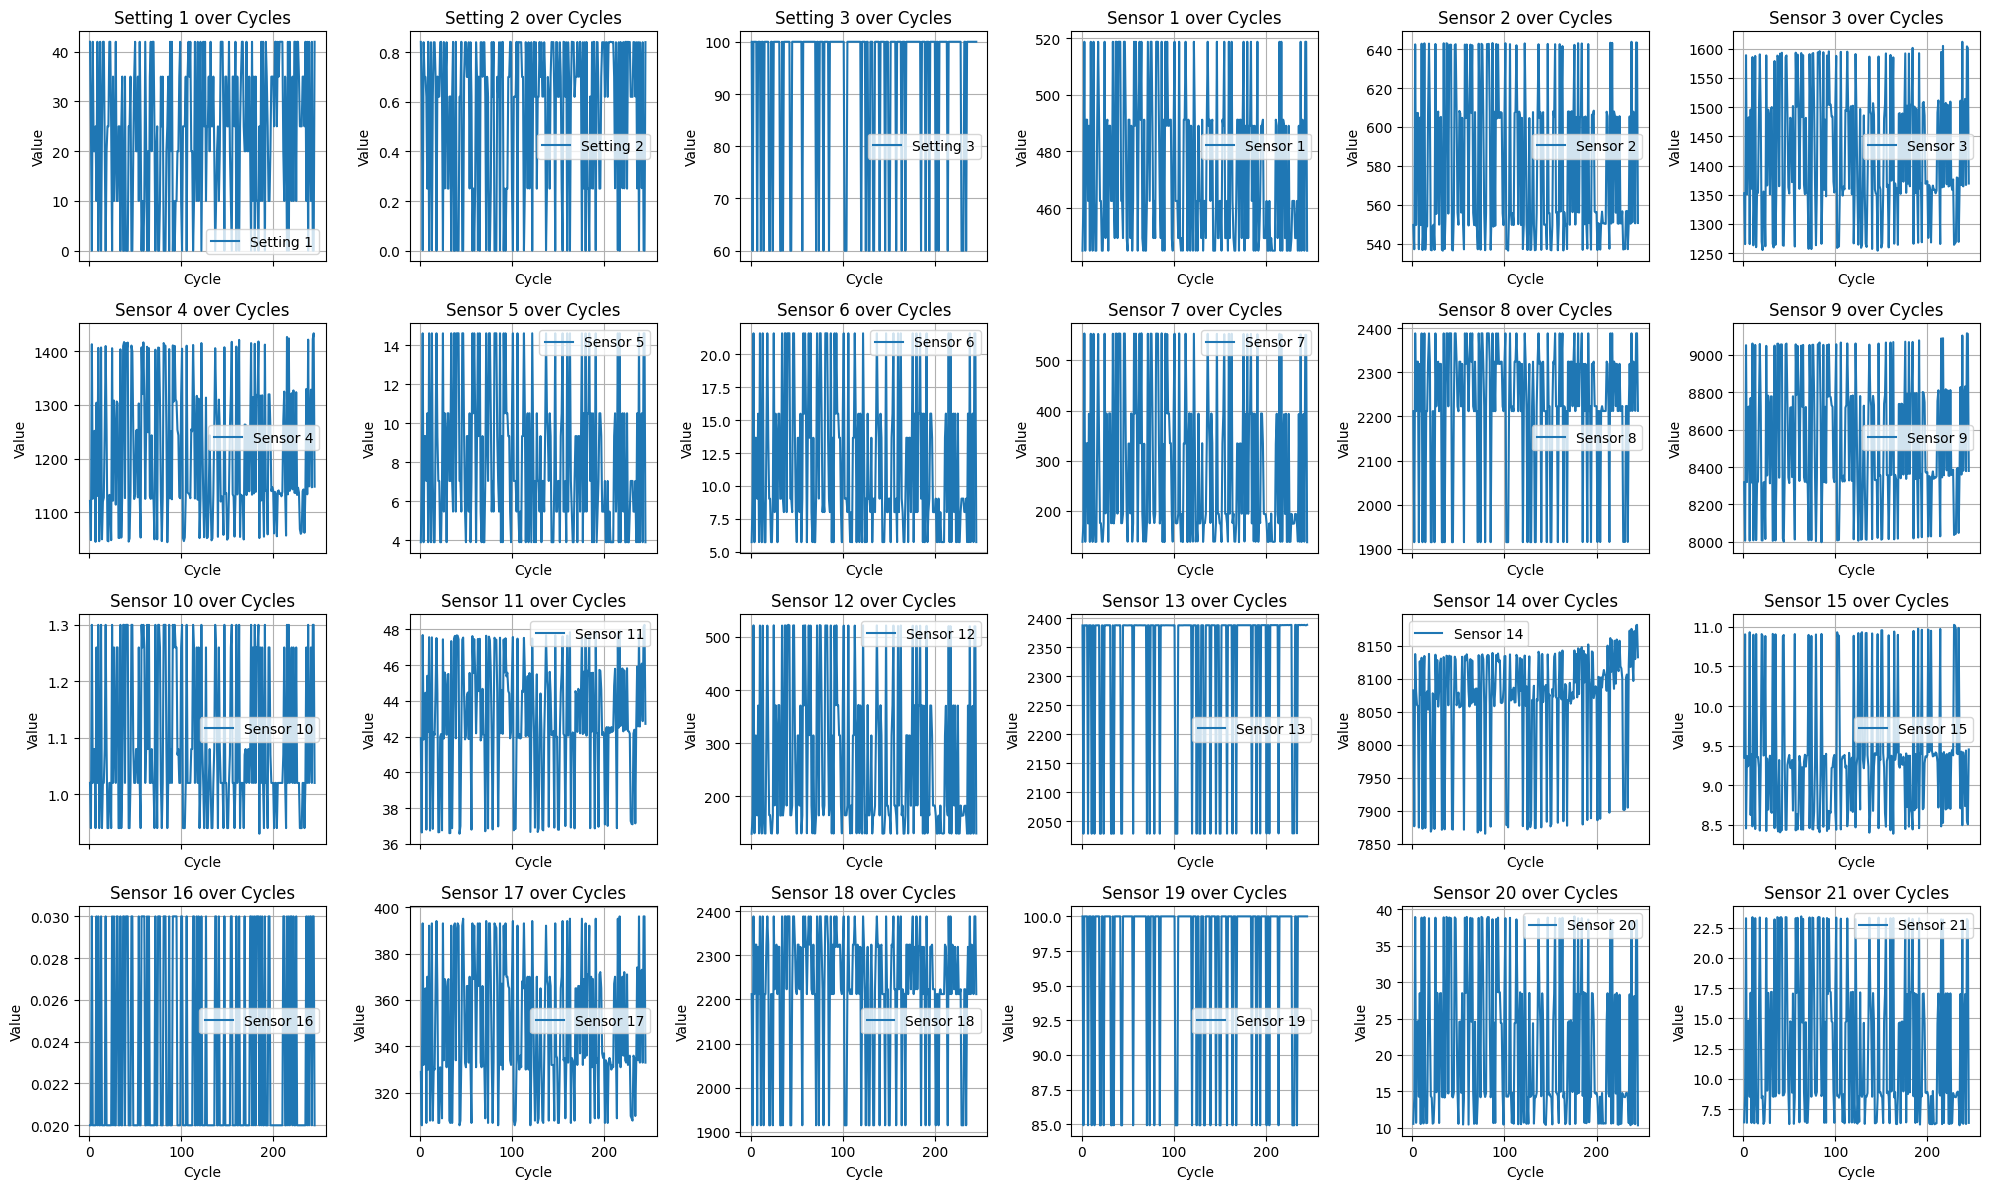

In [18]:
def info_plotting_per_engine(engine_num, data):
    engine_data = data[data['ID Engine'] == engine_num]

    columns_to_plot = ['Setting 1', 'Setting 2', 'Setting 3'] + [f'Sensor {i}' for i in range(1, 22)]

    num_columns = 6
    num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 3), sharex=True)

    for ax, column in zip(axes.flatten(), columns_to_plot):
        ax.plot(engine_data['Cycle'], engine_data[column], label=column)
        ax.set_title(f'{column} over Cycles')
        ax.set_xlabel('Cycle')
        ax.set_ylabel('Value')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

#just select the desired engine number
info_plotting_per_engine(engine_num=20, data=train_4)

* **Phân tích:**
Chọn ngẫu nhiên động cơ số 20 để vẽ đường đồ thị biến động của nó, đường cong này thể hiện hành vi của từng cảm biến và thậm chí cả 3 thông số (Setting) được sử dụng trong mỗi chu kỳ.
Cần lưu ý rằng một số cảm biến "Sensor 1", "Sensor 5", "Sensor 6", "Sensor 10", "Sensor 16", "Sensor 18", "Sensor 19" và tham số "Setting 3" biểu diễn một đường cong tuyến tính liên tục, giải thích rằng chúng là một giá trị hằng số trong suốt vòng đời của động cơ này và hơn nữa, điều này đã được xác nhận trước đó trong phần mô tả chung về bộ dữ liệu khi biết rằng bất kỳ giá trị hằng số nào cũng sẽ vô dụng đối với các mô hình dự đoán.
Quan sát thấy có sự thay đổi đáng kể về ngoại hình của các cảm biến còn lại ngay cả khi giá trị của tham số 1 và 2 khác nhau mỗi lần trong suốt vòng đời tối đa của động cơ này. Điều này luôn được biểu thị bằng sự tăng trưởng hoặc giảm
* **kết luận:**
Tất cả các cảm biến được đề cập đến "Sensor 5", "Sensor 6", "Sensor 16", ta có thể loại bỏ chúng nhưng trước tiên phải kiểm tra xem giá trị này có đúng với tất cả các động cơ hay không ngay cả khi chúng ta đã thấy rằng nó đúng với một số động cơ là "Sensor 1", "Sensor 10", "Sensor 18", "Sensor 19" với tham số "Setting 3".
Ngoài ra, chúng ta phải kiểm tra hành vi này của các cảm biến còn lại đối với tất cả các động cơ, điều này có thể giúp chúng ta hiểu được lý do khiến động cơ bị suy giảm.
Vì vậy, chỉ cần xác nhận giả thuyết của mình rằng tất cả các cảm biến "Sensor 1", "Sensor 5", "Sensor 6", "Sensor 10", "Sensor 16", "Sensor 18", "Sensor 19" đều vô dụng.


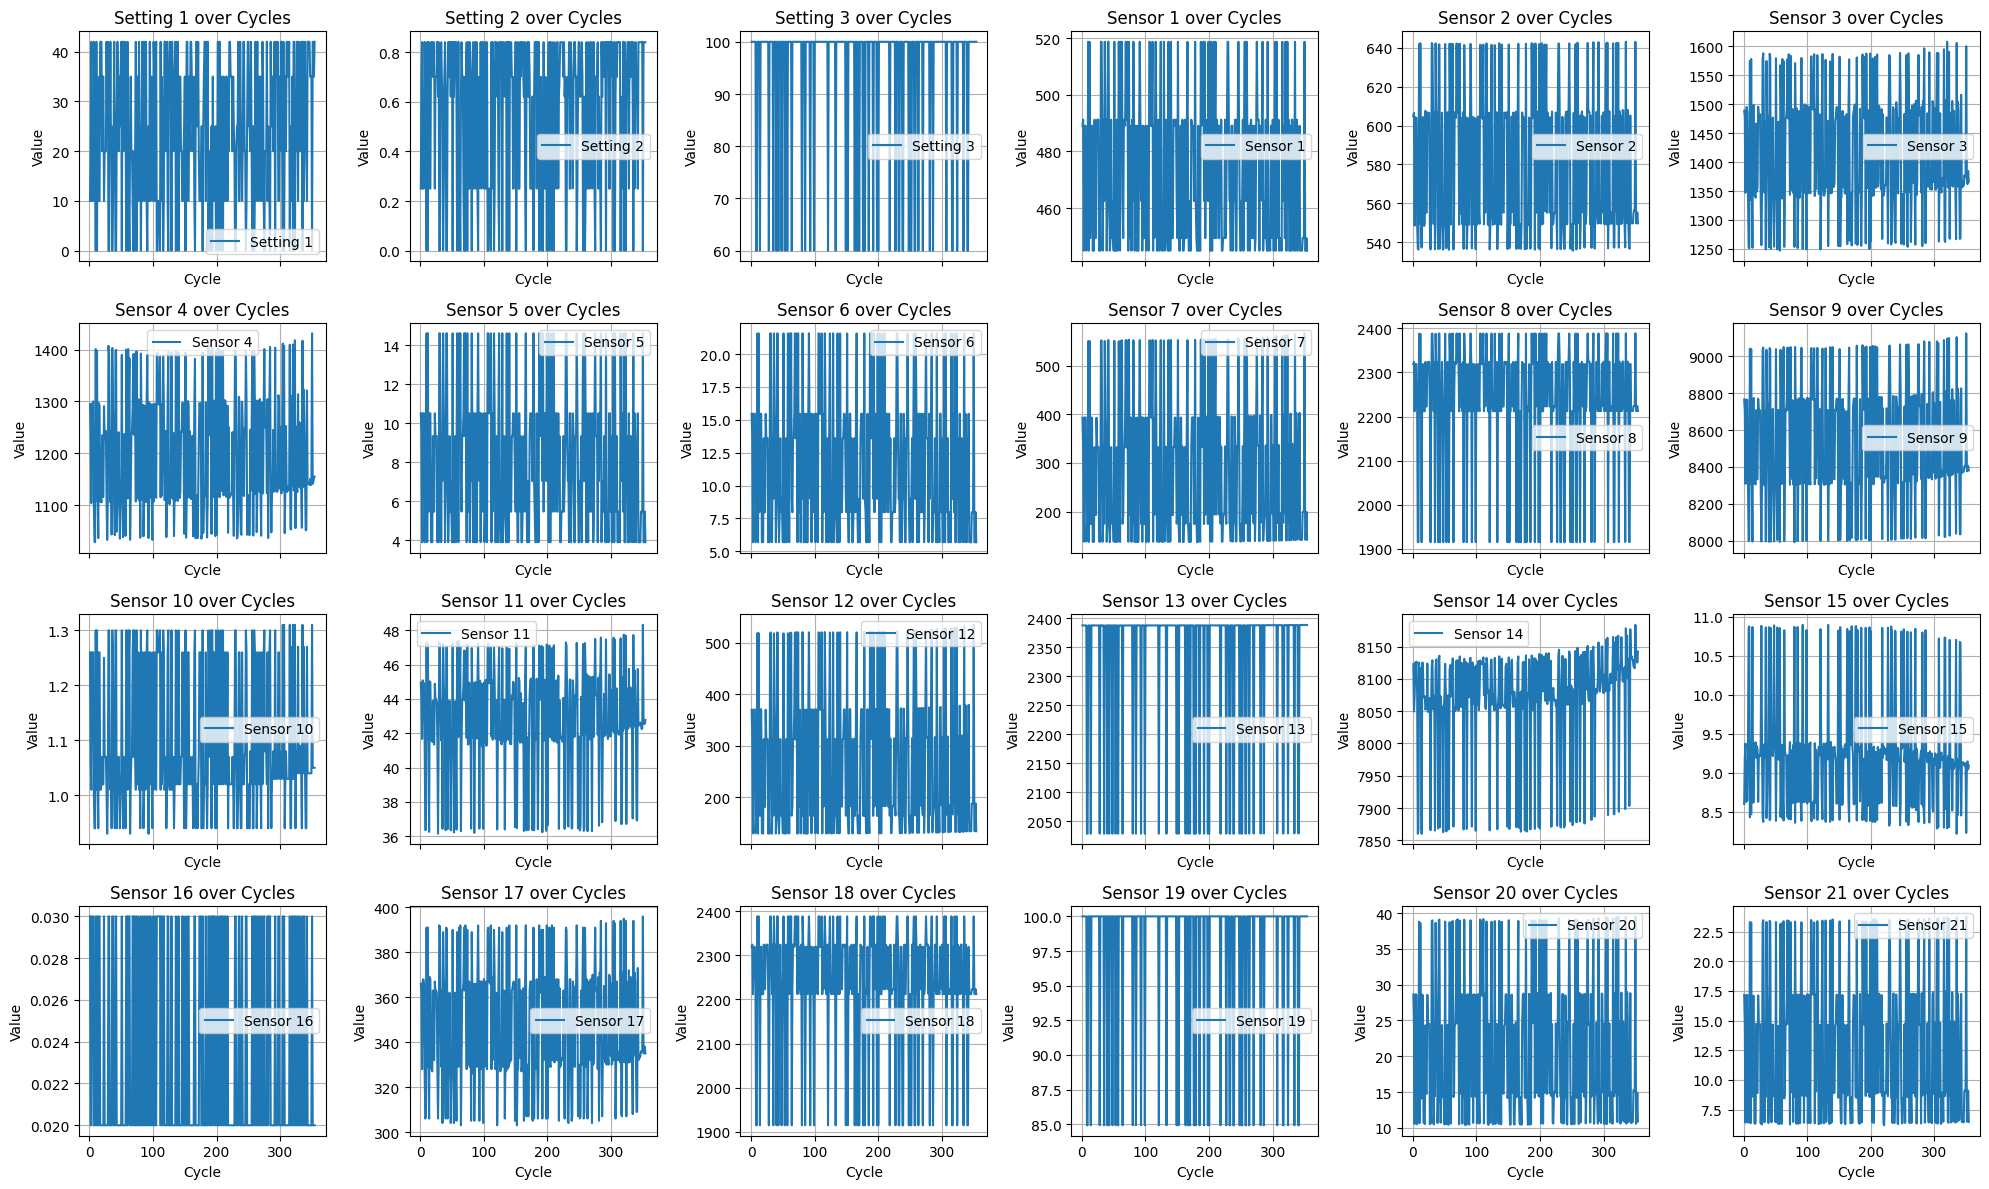

In [19]:
info_plotting_per_engine(engine_num=10, data=train_4)

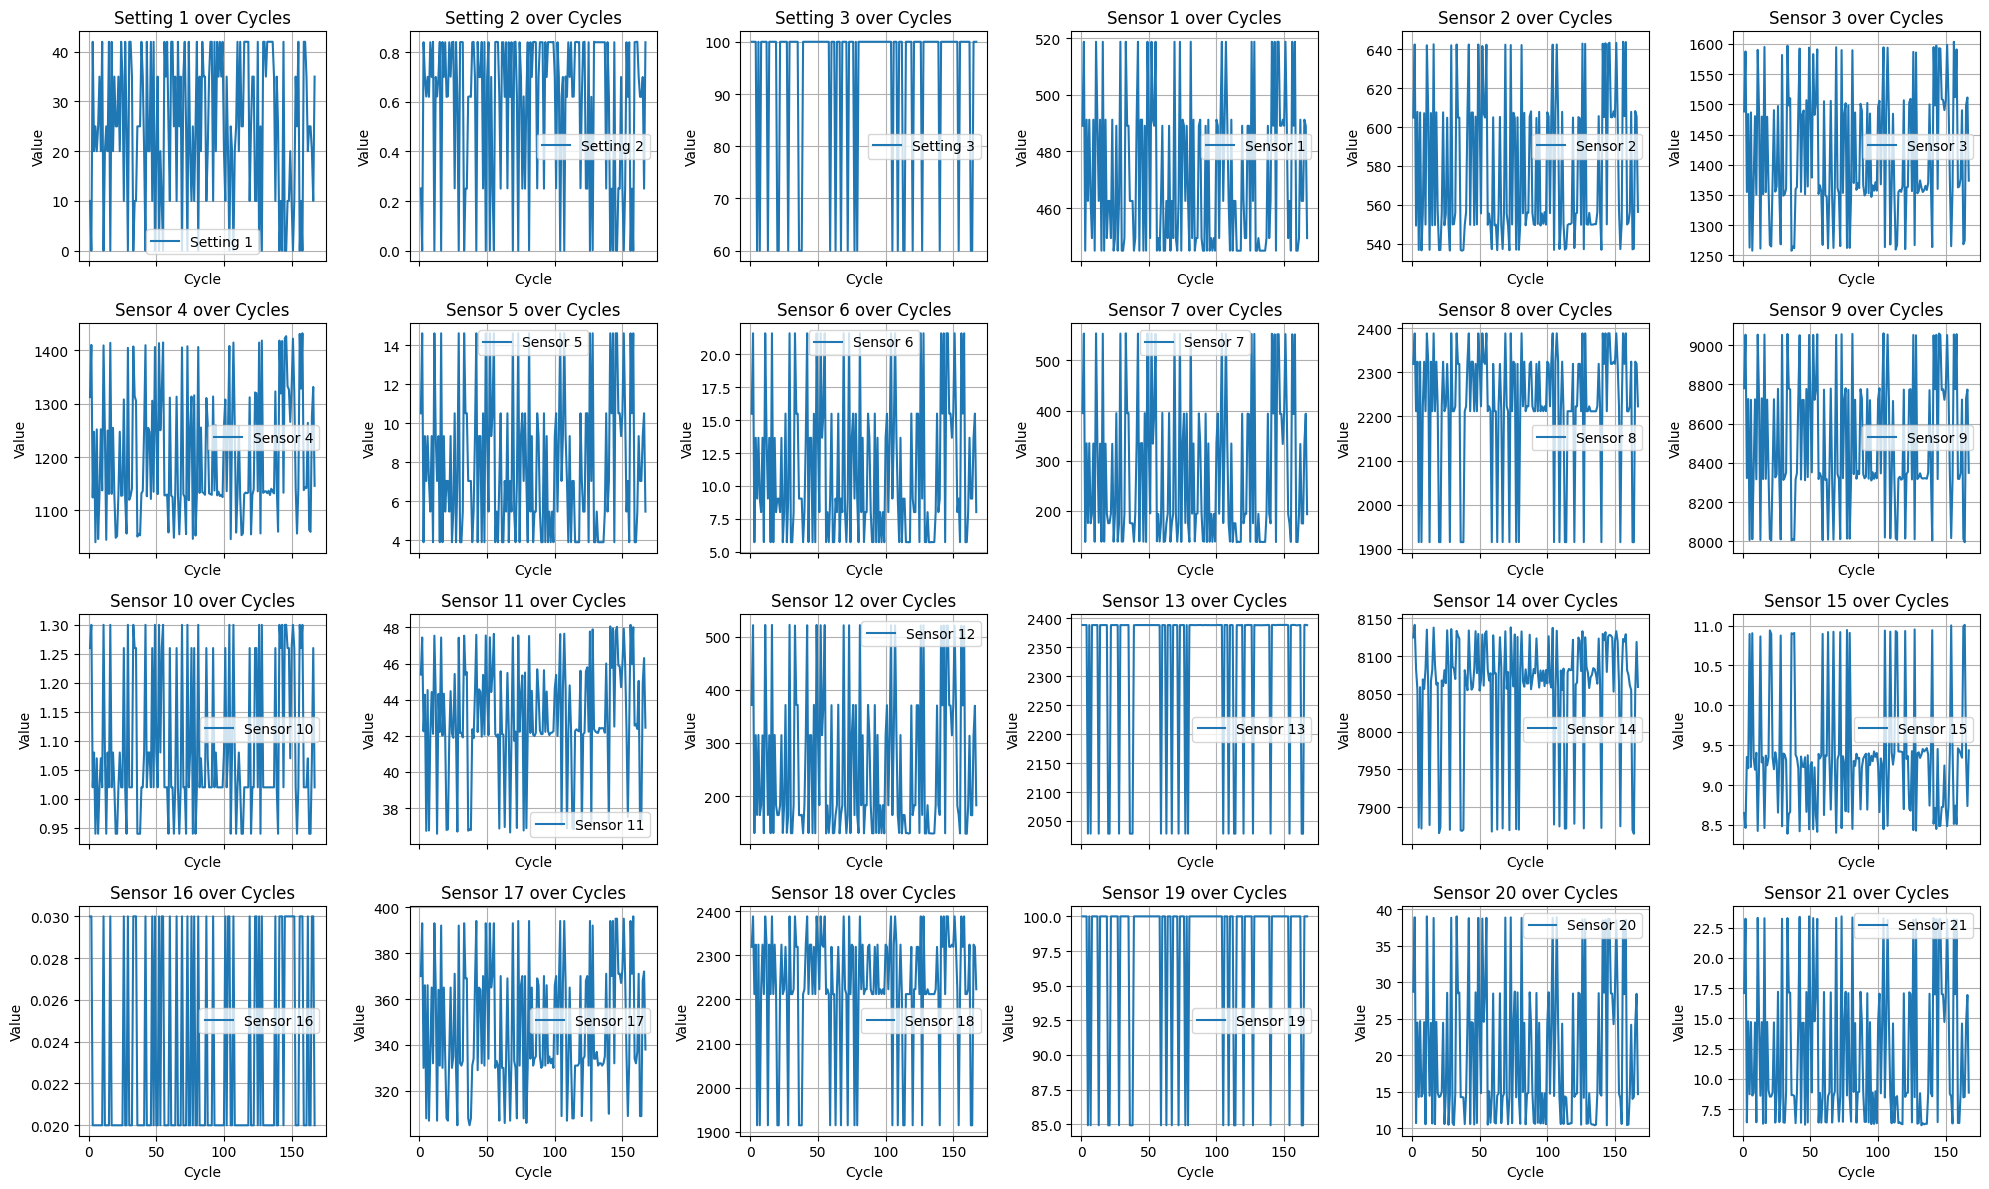

In [20]:
info_plotting_per_engine(engine_num=99, data=train_4)

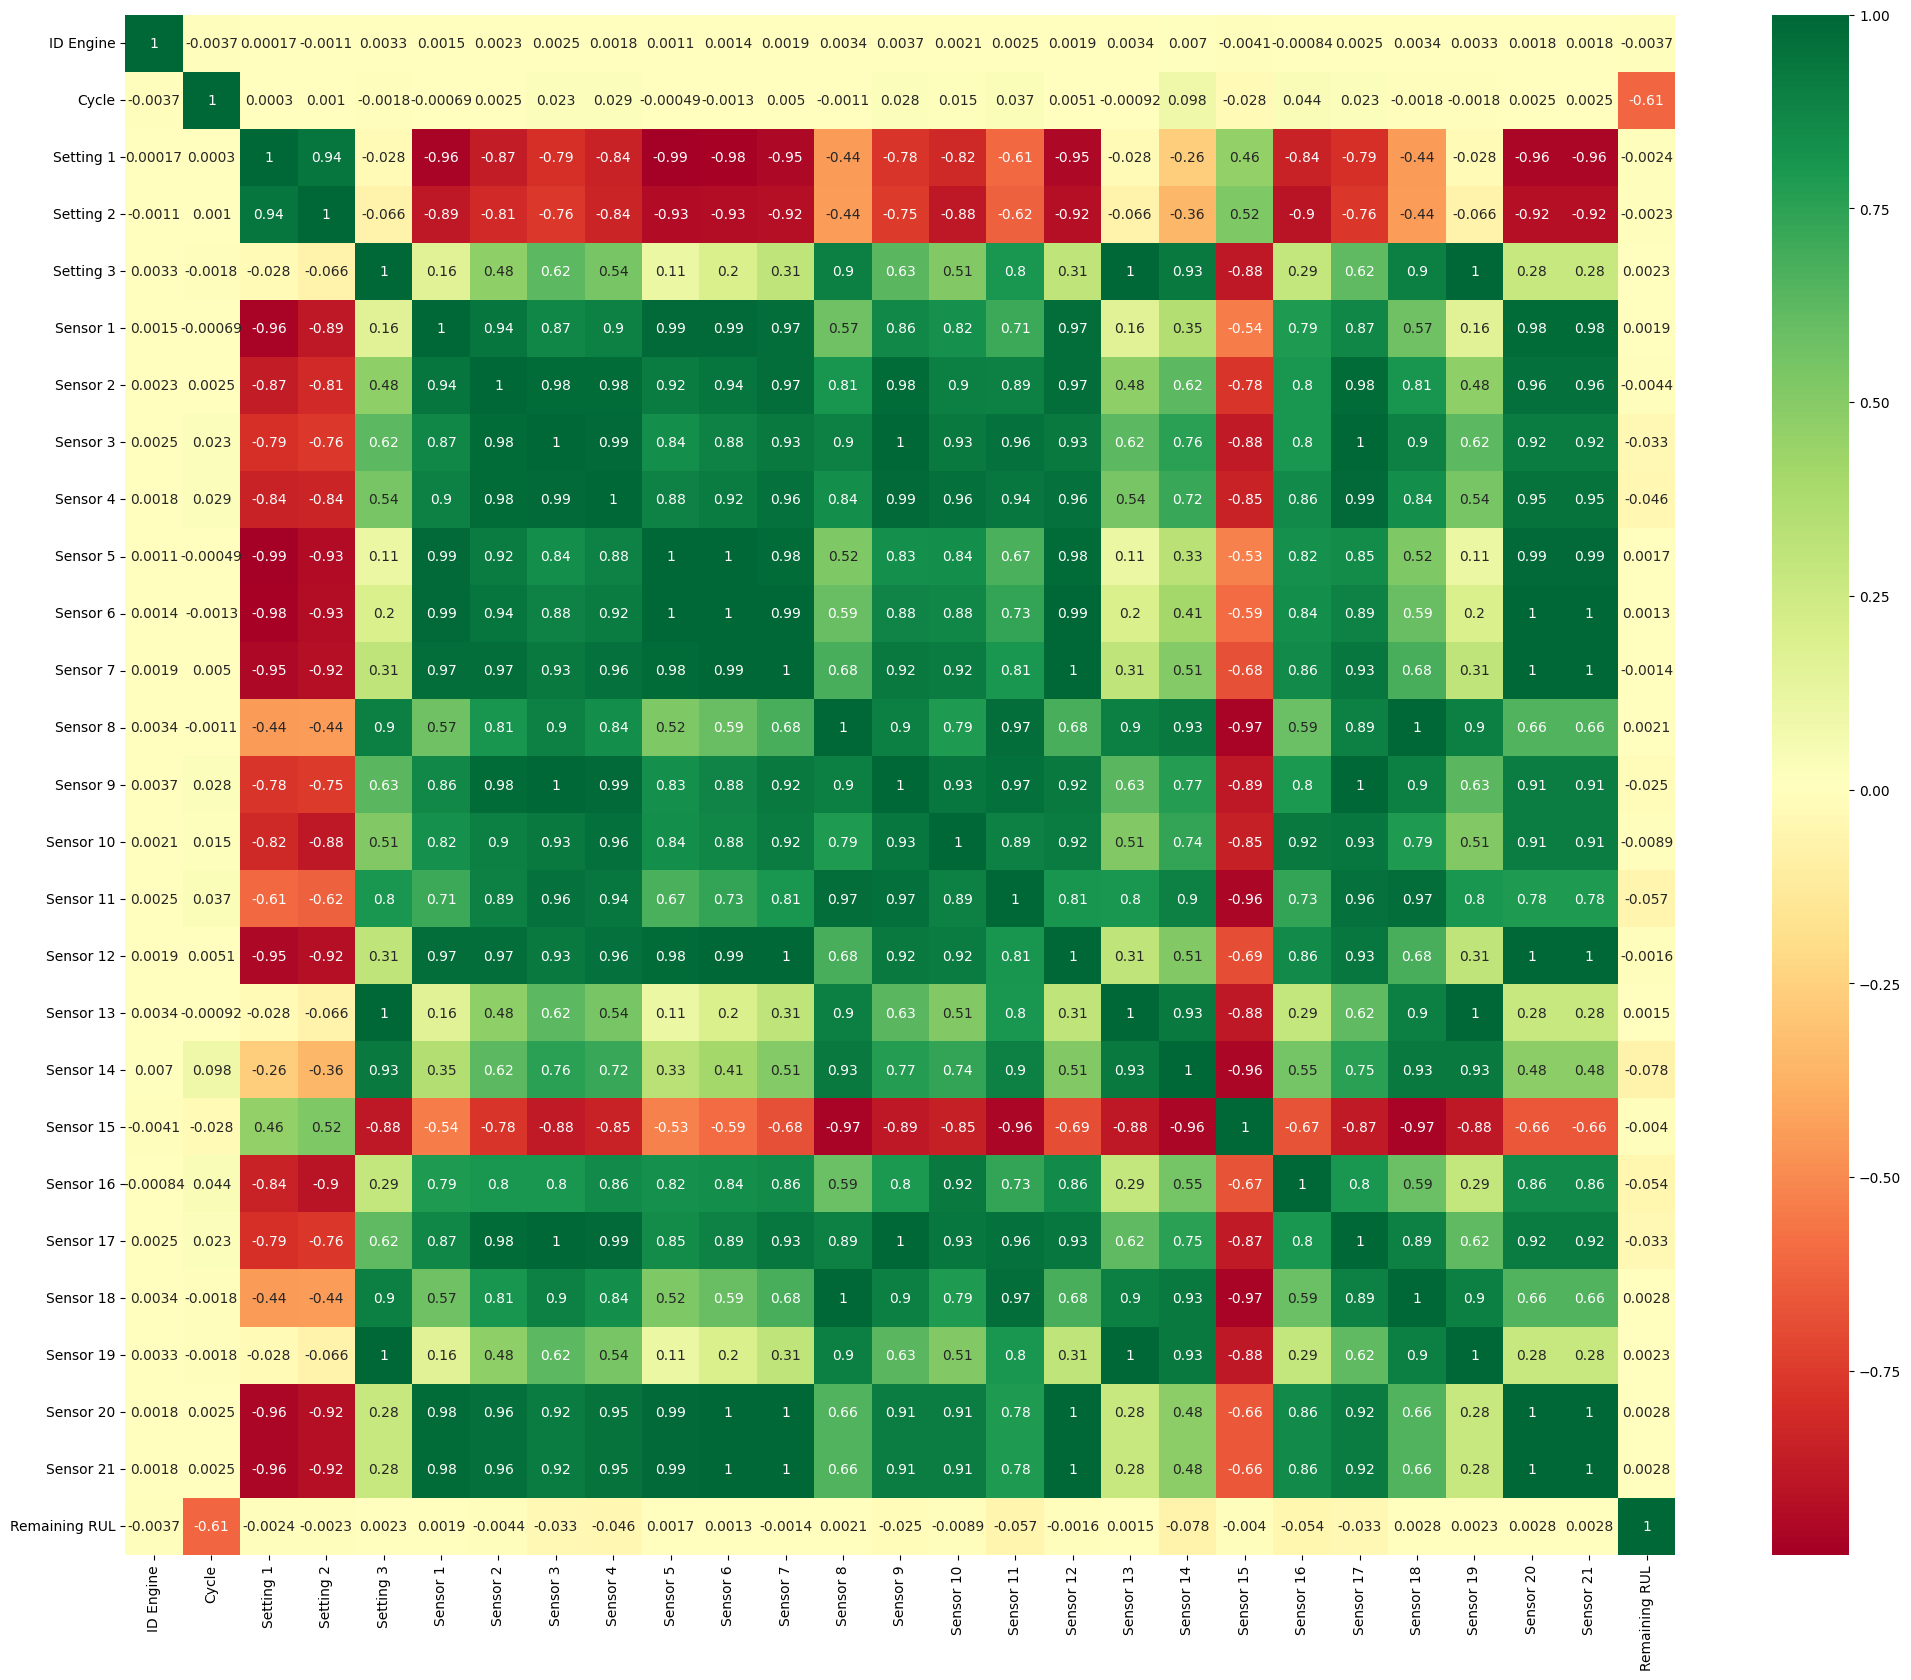

In [21]:
def corr_matrix(data):
    plt.figure(figsize=(25, 20))
    sns.set_context(font_scale=0.01)
    sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
    plt.grid(False)

corr_matrix(data=train_4)

* **Phân tích:**
Nhận thấy rằng thiếu giá trị hệ số tương quan cho các cảm biến 1,10,18,19 "Sensor 1", "Sensor 10", "Sensor 18", "Sensor 19" và tham số "setting3" mà chúng tôi đã đề cập ngay từ đầu EDA, điều này được giải thích bởi thực tế là độ lệch chuẩn của chúng bằng 0 và độ lệch chuẩn là căn bậc hai của phương sai.
Đối với cảm biến 16 "Sensor 16" vì độ lệch chuẩn "std" của nó rất rất gần với 0, hãy kiểm tra trong mô tả dữ liệu ở giá trị chính xác là 1,5564321e-14 nên không thể tính toán được mối tương quan của nó. Tương tự như vậy đối với cảm biến 5 "Sensor 5" có độ lệch chuẩn "std" là 3,394700e-12.
Bây giờ chúng ta phải tập trung vào hệ số tương quan giữa vòng đời còn lại "RUL" nên chỉ kiểm tra dòng cuối cùng. Theo ma trận tương quan, thấy rằng các tham số 1 và 2 "Setting 1", "Setting 1" có hệ số rất rất gần với 0. Tương tự như vậy đối với cảm biến 6 "Sensor 6", nó thừa nhận một hệ số âm quá nhỏ với giá trị là -0,13.
Các cảm biến 7,12,20 và 21 "Sensor 7", "Sensor 12", "Sensor 20", "Sensor 21" thừa nhận một mối tương quan dương mạnh với "RUL" với các giá trị liên tiếp là 0,66, 0,67, 0,63 và 0,64.
Trong khi các cảm biến còn lại có mối tương quan âm với "RUL", đặc biệt là 2,4,11,15,17 "Sensor 2", "Sensor 4", "Sensor 11", "Sensor 15", "Sensor 17" có mối tương quan âm mạnh.
* **Kết luận:**
Từ phân tích trên, có thể xác nhận rằng tất cả các cảm biến sau đây sẽ vô dụng (vô dụng -> không biểu thị mối tương quan hoặc ko thể hiện được ý nghĩa tới các biến độc lập khác) trong các mô hình dự đoán mà phát triển và các cảm biến của chúng là "Sensor 1", "Sensor 5", "Sensor 6", "Sensor 10", "Sensor 16", "Sensor 18", "Sensor 19". Từ đó, sẽ có cơ hội loại bỏ chúng khỏi Bộ dữ liệu của mình cùng với 3 tham số vận hành (Setting 1,2,3).
Đối với các cảm biến còn lại, mối tương quan mạnh bất kể là tiêu cực hay tích cực giải thích rằng chúng có mối quan hệ quan trọng mạnh mẽ với sự xuống cấp của động cơ, vì vậy cần phải phân tích sâu hơn nữa về từng cảm biến để hiểu được tính hữu ích của chúng và lý do cho sự xuống cấp này.

In [22]:
train_4 = train_4.drop(['Setting 1','Setting 2', 'Sensor 1', 'Setting 3','Sensor 5','Sensor 6', 'Sensor 10', 'Sensor 16', 'Sensor 18','Sensor 19'], axis=1)
train_4.head()

,ID Engine,Cycle,Sensor 2,Sensor 3,Sensor 4,Sensor 7,Sensor 8,Sensor 9,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 17,Sensor 20,Sensor 21,Remaining RUL
0,1,1,549.68,1343.43,1112.93,137.36,2211.86,8311.32,41.69,129.78,2387.99,8074.83,9.3335,330,10.62,6.3670,320
1,1,2,606.07,1477.61,1237.50,332.10,2323.66,8713.60,43.94,312.59,2387.73,8046.13,9.1913,361,24.37,14.6552,319
2,1,3,548.95,1343.12,1117.05,138.18,2211.92,8306.69,41.66,129.62,2387.97,8066.62,9.4007,329,10.48,6.4213,318
3,1,4,548.70,1341.24,1118.03,137.98,2211.88,8312.35,41.68,129.80,2388.02,8076.05,9.3369,328,10.54,6.4176,317
4,1,5,536.10,1255.23,1033.59,174.82,1915.22,7994.94,36.48,164.11,2028.08,7865.80,10.8366,305,14.03,8.6754,316
